In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error
import statsmodels.api as sm 
from sklearn.preprocessing import PolynomialFeatures

In [2]:
np.random.seed(42)  # Ensuring reproducibility of random noise
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

In [3]:
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [4]:
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [5]:
model=LinearRegression()
model.fit(X_poly, Y) 

LinearRegression()

In [6]:
print('slope(m)',model.coef_[0])
print('intercept(c)',model.intercept_)

slope(m) 0.0
intercept(c) 25.834848216909297


In [7]:
print(f"Equation of the line: Y = {model.coef_[0]:,.2f}X + {model.intercept_:,.2f}")

Equation of the line: Y = 0.00X + 25.83


In [8]:
Y_pred=model.predict(X_poly)

In [9]:
#mean_square_error
mse=mean_squared_error(Y,Y_pred)
print(f"mean square error (mse):{mse:,.2f}")

mean square error (mse):11.47


In [10]:
#mean_absolute_error
mae=mean_absolute_error(Y,Y_pred)
print(f"mean absolute error(mae):{mae:,.2f}")

mean absolute error(mae):2.98


In [11]:
# root_mean_square_error
rmse=root_mean_squared_error(Y,Y_pred)
print(f"root mean square error(rmse):{rmse:,.2f}")

root mean square error(rmse):3.39


In [12]:
# r-square   - represents how well models fits the data(0 to 1,where 1 is best)
r2=r2_score(Y,Y_pred)
print(f"r2:{r2:.2f}")

r2:0.95


In [13]:
# adjusted r2 - adjusted for no.of predictors,better for multiple regression
n=len(Y)#no.of obs
p=1#no.of independent var
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"adjusted r2:{adj_r2:.2f}")

adjusted r2:0.94


In [14]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        13:32:11   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\CVR\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


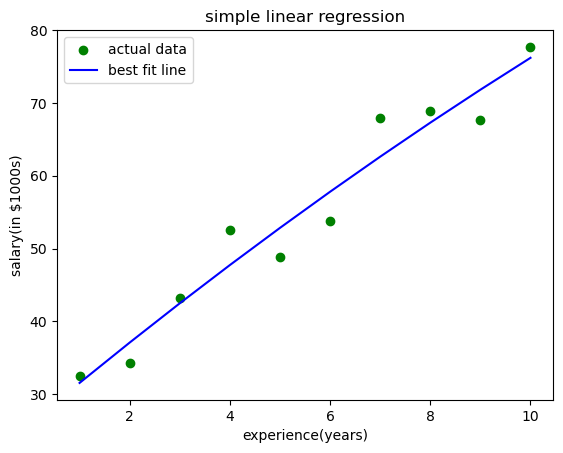

In [15]:
#step8:visualization
#plot the actual data points
plt.scatter(X,Y, color='green',label='actual data')

#plot the regression line (best fit line)
plt.plot(X,Y_pred,color='blue',label='best fit line')

plt.xlabel('experience(years)')
plt.ylabel('salary(in $1000s)')
plt.title('simple linear regression')
plt.legend()
plt.show()

In [16]:
#step9:feature prediction
while True:
    try:
        exp=(float(input("Enter the years of experince to predict the salary (or -1 to exit):")))
        if exp==-1:
            break
        exp_poly=poly.transform(np.array([[exp]]))    
        predicted_sal=model.predict(exp_poly)[0]
        print(f"Predicted salary for {exp}years of experience:${predicted_sal:,.2f}k")
    except ValueError:
        print("Please enter a valid number!")   

Enter the years of experince to predict the salary (or -1 to exit):4
Predicted salary for 4.0years of experience:$47.73k
Enter the years of experince to predict the salary (or -1 to exit):-1
